# <center>        **Machine Learning-ASSIGNMENT**</center>

# **PART A**

# 1. Import Libraries/Dataset

a. Download the Dataset                              

b. Import the required libraries

In [1]:
# Importing Required Libraries
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report

# Download DataSet
google_drive_link = 'https://drive.google.com/file/d/1g5uDcFd22cmiSU0spwgidiMcywW7Yryj/view?usp=sharing'

# Get the file ID from the Google Drive link
file_id = google_drive_link.split('/')[-2]

# Download the XLSX file
url = f'https://drive.google.com/uc?id={file_id}'
response = requests.get(url)

# Save the file locally
file_name = 'Plant_Tree_data.xlsx'
with open(file_name, 'wb') as f:
    f.write(response.content)

# Read the XLSX file into a Pandas DataFrame
df = pd.read_excel(file_name)

# 2. Data Visualization and Exploration

a. Print at least 5 rows for sanity check to identify all the features present in the dataset and if the target matches with them.                                 
   
b. Print the description and shape of the dataset.
    
c. Provide appropriate visualization to get an insight about the dataset.
    
d. Try exploring the data and see what insights can be drawn from the dataset.

In [2]:
# Print first 5 rows to identify all the features present in the dataset
df.head()

,LeafLength,LeafBreadth,ErrorLeafLength,ErrorLeafBreadth,LeafCurveAngle,EdgeCurvatureAngle,ErrorLeafCurvature,TreeLength,TreeType
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
# Description and shape of the dataset
print(df.describe())
df.shape

         LeafLength   LeafBreadth  ErrorLeafLength  ErrorLeafBreadth  \
count  17898.000000  17898.000000     17898.000000      17898.000000   
mean     111.079968     46.549532         0.477857          1.770279   
std       25.652935      6.843189         1.064040          6.167913   
min        5.812500     24.772042        -1.876011         -1.791886   
25%      100.929688     42.376018         0.027098         -0.188572   
50%      115.078125     46.947479         0.223240          0.198710   
75%      127.085938     51.023202         0.473325          0.927783   
max      192.617188     98.778911         8.069522         68.101622   

       LeafCurveAngle  EdgeCurvatureAngle  ErrorLeafCurvature    TreeLength  \
count    17898.000000        17898.000000        17898.000000  17898.000000   
mean        12.614400           26.326515            8.303556    104.857709   
std         29.472897           19.470572            4.506092    106.514540   
min          0.213211            7.

(17898, 9)

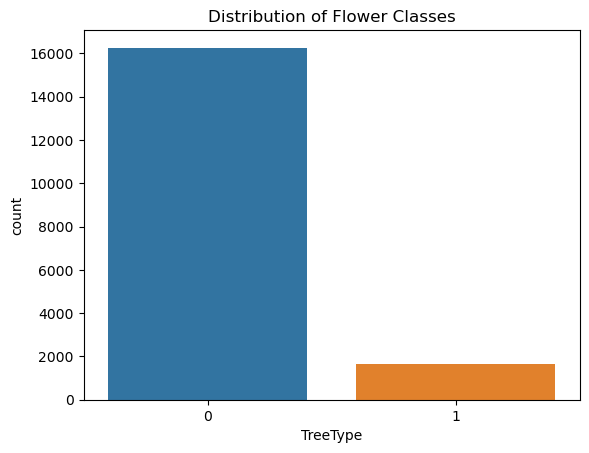

In [4]:
# Visualization to get an insight about the dataset

# Count Plot to visualize distribution of each class in the dataset.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TreeType', data=df)
plt.title('Distribution of Flower Classes')
plt.show()

In [ ]:
# Pair Plot to visualize relationships between multiple features
sns.pairplot(df, hue='TreeType')
plt.title('Pair Plot of Features')
plt.show()

In [ ]:
# Correlation Heatmap to visualize the relationships between these features.
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Data Exploration

# Display column headings
print(df.columns)

# Data types and non-null counts
df.info()

In [ ]:
# Feature vs. Target Analysis (Box plots)
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['LeafLength', 'LeafBreadth', 'ErrorLeafLength', 'ErrorLeafBreadth', 'LeafCurveAngle', 'EdgeCurvatureAngle', 'ErrorLeafCurvature', 'TreeLength']):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x='TreeType', y=feature, data=df)
    plt.title(f'{feature} vs. TreeType')
plt.tight_layout()
plt.show()

We are able to visualize how the distribution of each feature varies across different classes of the target variable by performing a Feature vs. Target Analysis using box plots. This analysis provides insights into the relationship between individual features and the target, which can help us understand features which are potentially significant for predicting the target classes. This gives us insights on Outliers and Variability, Feature importance, Skewness, Potential Data imbalance.

# 3. Data Pre-processing and cleaning

a. Do the appropriate preprocessing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Apply appropriate feature engineering techniques for them.
    
b. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. [Done in 4(b)]
    
c. Do the correlational analysis on the dataset. Provide a visualization for the same.

In [ ]:
# Check for duplicate data
duplicate_data = df[df.duplicated()]
if duplicate_data.empty:
    print('No duplicate data found')
else:
    print('Duplicate data:\n', duplicate_data)

In [ ]:
# Check for missing data
missing_data = df.isnull().sum().sum()
if missing_data == 0:
    print('No missing data found')
else:
    print('Missing data count:', missing_data)

In [ ]:
# Columns to check for Outliers
numeric_columns = ['LeafLength', 'LeafBreadth', 'ErrorLeafLength', 'ErrorLeafBreadth', 'LeafCurveAngle', 'EdgeCurvatureAngle', 'ErrorLeafCurvature', 'TreeLength']

In [ ]:
# Use the Interquartile Range (IQR) method to find outliers
def find_outliers_iqr(data, column, multiplier=1.5):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Finding outliers for each numeric column
outliers_dict = {}
for col in numeric_columns:
    outliers_dict[col] = find_outliers_iqr(df, col)

# Print the outliers for each column
for col, outliers in outliers_dict.items():
    if outliers.empty:
        print(f"No outliers found in {col}.")
    else:
        print(f"Outliers in {col}:")
        print(outliers)

In [ ]:
# Use box plots to visualize potential outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot for {col}')
plt.suptitle('Box Plot Before Handling Outliers', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Handle outliers using feature engineering techniques
def handle_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Reduce impact of extreme values using winsorize method
    threshold = 0.05
    data[column] = np.where(data[column] < data[column].quantile(threshold), data[column].quantile(threshold), data[column])
    data[column] = np.where(data[column] > data[column].quantile(1 - threshold), data[column].quantile(1 - threshold), data[column])
    return data

# Apply outlier handling for each column
for col in numeric_columns:
    df = handle_outliers(df, col)

In [ ]:
# Visualize the distributions after handling outliers
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot for {col}')
plt.suptitle('Box Plot After Handling Outliers', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Calculate skewness for each numeric column
skewness = df[numeric_columns].skew()

# Visualize the distributions of numeric columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col}\nSkewness: {skewness[col]:.2f}')
plt.suptitle('Histogram Before Handling Skewness', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Handle skewness using log feature transformation
def handle_skewness(data, column):
    data[column] = np.log1p(data[column])
    return data

skew_columns=['ErrorLeafLength', 'ErrorLeafBreadth', 'LeafCurveAngle', 'EdgeCurvatureAngle']
# Apply skewness handling for each column
for col in skew_columns:
    df = handle_skewness(df, col)

In [ ]:
# Visualize the distributions after handling skewness
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns):
    plt.subplot(2, 4, i+1)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}')
plt.suptitle('Histogram After Handling Skewness', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Correlational analysis on the dataset

# Compute the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap for visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 4. Data Preparation

a. Do the final feature selection and extract them into Column X and the class label into Column into Y.

b. Split the dataset into training and test sets.

In [ ]:
# Final Feature Selection

# Correlation-based feature selection
correlation_threshold = 0.5

# Correlation matrix Calculation
correlation_matrix = df.corr()

# Features that have high correlation with the target ('TreeType')
target_correlations = correlation_matrix['TreeType'].abs().sort_values(ascending=False)
selected_features = target_correlations[target_correlations >= correlation_threshold].index.tolist()
selected_features.remove('TreeType')

# Removing features with low variance
variance_threshold = 0

# Initializing the VarianceThreshold object
variance_selector = VarianceThreshold(threshold=variance_threshold)

# Fit and transform the data to remove low-variance features
X_high_variance = variance_selector.fit_transform(df[selected_features])

# Get the selected feature names after variance thresholding
selected_features = [feature for idx, feature in enumerate(selected_features) if variance_selector.get_support()[idx]]

# Extract selected features into 'X' and the target class label into 'Y'
X = df[selected_features]
Y = df['TreeType']

# Display the list of selected features
print("Selected Features:", selected_features)

In [ ]:
# Split the dataset into 80% training and 20% test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Applying the feature transformation techniques like Standardization, Normalization

# Applying Standardization (Z-score normalization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Applying Min-Max Normalization and defining the range
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.fit_transform(X_test)

# Verifying the shape of the datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

# **PART B**

# 1. Model Building
    
a. Perform Model Development using at least three models, separately. You are free to apply any Machine Learning Models on the dataset. Deep Learning Models are strictly not allowed.

b. Train the model and print the training accuracy and loss values.

In [ ]:
# Model Development and Training

# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, Y_train)
Y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(Y_test, Y_pred_logreg)
loss_logreg = log_loss(Y_test, logreg_model.predict_proba(X_test))

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
loss_rf = log_loss(Y_test, rf_model.predict_proba(X_test))

# Support Vector Machine (SVM)
svm_model = SVC(probability=True)
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
loss_svm = log_loss(Y_test, svm_model.predict_proba(X_test))

In [ ]:
# Printing the training accuracy and loss values for each model
print("Model 1: Logistic Regression")
print("Training Accuracy:", accuracy_logreg)
print("Training Log Loss:", loss_logreg)
print()

print("Model 2: Random Forest")
print("Training Accuracy:", accuracy_rf)
print("Training Log Loss:", loss_rf)
print()

print("Model 3: Support Vector Machine (SVM)")
print("Training Accuracy:", accuracy_svm)
print("Training Log Loss:", loss_svm)
print()


# 2. Performance Evaluation

a. Print the confusion matrix. Provide appropriate analysis for the same.

b. Do the prediction for the test data and display the results for the inference.


In [ ]:
# Printing the confusion matrix and analysis
def print_confusion_matrix(model, X_test, Y_test):
    Y_pred = model.predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    print("Confusion Matrix:")
    print(cm)
    print()

    print("Classification Report:")
    print(classification_report(Y_test, Y_pred))
    print()

print("Model 1: Logistic Regression")
print_confusion_matrix(logreg_model, X_test, Y_test)

print("Model 2: Random Forest")
print_confusion_matrix(rf_model, X_test, Y_test)

print("Model 3: Support Vector Machine (SVM)")
print_confusion_matrix(svm_model, X_test, Y_test)

In [ ]:
 # Perform predictions on the test data and display the results
def perform_inference(model, data):
    inference_results = model.predict(data)
    return inference_results

inference_results = perform_inference(logreg_model, X_test)

print("Inference Results:")
print(inference_results)
